In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("penguins.csv")


In [9]:
df = df.dropna()

In [10]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [77]:
penguin_test, _ = train_test_split(df, test_size=0.4, random_state=42)
penguin_test = penguin_test[['body_mass_g', 'culmen_length_mm', 'flipper_length_mm']]


In [90]:
model = KMeans(n_clusters = 2)

In [91]:
model.fit(penguin_test)

KMeans(n_clusters=2)

In [95]:
sil_score = silhouette_score(penguin_test, model.labels_)

In [98]:
model.cluster_centers_

array([[3638.37719298,   42.17280702,  191.53508772],
       [5045.97701149,   47.36666667,  214.40229885]])

In [96]:
sil_score  # 2 clusters = 0.63   # 3 clusters = 5.9

0.633934817755646

In [97]:
k_range = range(1, 11)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguin_test)
    sse.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


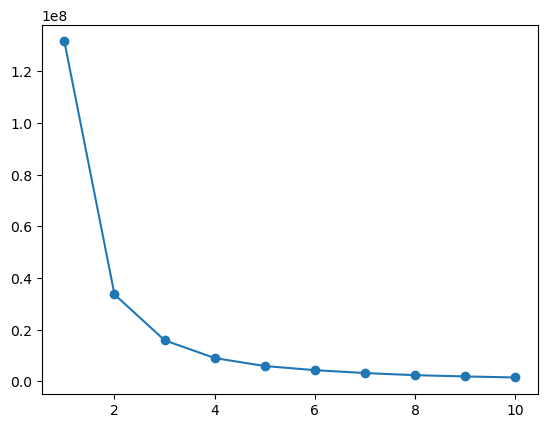

In [84]:
plt.plot(k_range, sse, marker='o')